# **Data Wrangling II**

## **Revisão Data Wrangling**

* A manipulação de dados ou Data Wrangling é o processo de limpeza e unificação de conjuntos de dados complexos e desordenados para facilitar seu acesso, análise e modelagem.
* Grande parte do tempo de um(a) cientista de dados é investido na manipulação de dados.

## **Etapas do data wrangling**
1. Descobrimento
2. Estruturação
3. Limpeza
4. Enriquecimento
5. Validação
6. publicação

## **Data Transformation**
### **Map**

Permite aos usuários aplicar uma função a cada elemento de uma lista, funcionando de forma iterativa, muito semelhante a um loop.

In [1]:
import pandas as pd
import numpy as np

In [13]:
aux_dict = {"Barbarian":[80, 90, 70, 95, 65], 
             "Prey":     [60, 65, 56, 65, 60], 
             "Mandy" :   [80, 57, 80, 78, 68],
             "Upgrade" : [78, 83, 67, 75, 55],
             "Premiado": ["Yes","Yes","No","No","No"]}
  
df = pd.DataFrame(aux_dict)
df

,Barbarian,Prey,Mandy,Upgrade,Premiado
0,80,60,80,78,Yes
1,90,65,57,83,Yes
2,70,56,80,67,No
3,95,65,78,75,No
4,65,60,68,55,No


In [3]:
df["Premiado_dummy"] = df["Premiado"].map({"Yes": 1,
                                           "No":  0})
 
df

,Barbarian,Prey,Mandy,Upgrade,Premiado,Premiado_dummy
0,80,60,80,78,Yes,1
1,90,65,57,83,Yes,1
2,70,56,80,67,No,0
3,95,65,78,75,No,0
4,65,60,68,55,No,0


In [4]:
z = [2,5,6,4,2,2,3,5,4]
func2 = lambda x: x * 2

mapped_numbers = map(func2, z)
list(mapped_numbers)

[4, 10, 12, 8, 4, 4, 6, 10, 8]

In [5]:
type(mapped_numbers)

map

In [11]:
func2 = lambda x: x * 2

mapped_numbers = map(func2, df["Upgrade"])
df["Upgrade2"] = list(mapped_numbers)
df

,Barbarian,Prey,Mandy,Upgrade,Premiado,Premiado_dummy,Upgrade2
0,80,60,80,78,Yes,1,156
1,90,65,57,83,Yes,1,166
2,70,56,80,67,No,0,134
3,95,65,78,75,No,0,150
4,65,60,68,55,No,0,110


In [7]:
df.columns

Index(['Barbarian', 'Prey', 'Mandy', 'Upgrade', 'Premiado', 'Premiado_dummy',
       'Upgrade2'],
      dtype='object')

In [8]:
len(df.columns)

7

In [9]:
def len_names(x):
  return len(x)

x = map(len_names, df.columns)
list(x)

[9, 4, 5, 7, 8, 14, 8]

## **Apply**

Permite aos usuários enviar uma função e aplicá-la em cada valor da série Pandas. 
Se trata de uma grande melhoria para a biblioteca de pandas, já que essa função ajuda a segregar os dados de acordo com as condições necessárias, motivo pelo qual é utilizada de maneira eficiente na ciência de dados e no aprendizado automático.

In [15]:
aux_dict = {"Barbarian":[80, 90, 70, 95, 65], 
             "Prey":     [60, 65, 56, 65, 60], 
             "Mandy" :   [80, 57, 80, 78, 68],
             "Upgrade" : [78, 83, 67, 75, 55]}
  
df = pd.DataFrame(aux_dict)
df

,Barbarian,Prey,Mandy,Upgrade
0,80,60,80,78
1,90,65,57,83
2,70,56,80,67
3,95,65,78,75
4,65,60,68,55


In [16]:
df.apply(np.sqrt)

,Barbarian,Prey,Mandy,Upgrade
0,8.944272,7.745967,8.944272,8.831761
1,9.486833,8.062258,7.549834,9.110434
2,8.366600,7.483315,8.944272,8.185353
3,9.746794,8.062258,8.831761,8.660254
4,8.062258,7.745967,8.246211,7.416198


In [17]:
df.apply(np.sin)

,Barbarian,Prey,Mandy,Upgrade
0,-0.993889,-0.304811,-0.993889,0.513978
1,0.893997,0.826829,0.436165,0.968364
2,0.773891,-0.521551,-0.993889,-0.855520
3,0.683262,0.826829,0.513978,-0.387782
4,0.826829,-0.304811,-0.897928,-0.999755


In [18]:
cv = lambda x: np.std(x) / np.mean(x) * 100
df.apply(cv)

Barbarian    14.252193
Prey          5.603408
Mandy        12.369115
Upgrade      13.672892
dtype: float64

In [19]:
def cv2(x):
  cv = np.std(x) / np.mean(x) * 100
  return(cv)

df.apply(cv2)

Barbarian    14.252193
Prey          5.603408
Mandy        12.369115
Upgrade      13.672892
dtype: float64

In [20]:
df.apply(np.sum, axis = 1)

0    298
1    295
2    273
3    313
4    248
dtype: int64

In [21]:
def soma(x, z, k):
    return x + z + k

df = pd.DataFrame({'A': [1, 2, 3], 'B': [10, 20, 30]})

df1 = df.apply(soma, z = 1, k = 100)
print(df1)

     A    B
0  102  111
1  103  121
2  104  131


## **Dados Ausentes**

### **Dados ausentes. Por quê?**

* Como futuros Data Scientists, será comum se deparar com valores ausentes ou faltantes que poderiam vir das seguintes situações:
    * Falhas em alguma etapa do carregamento de dados.
    * Omissão direta do carregamento de dados.
    * Receio de um entrevistado em dar determinada resposta.

_Os valores ausentes são mais comuns do que pensa!_

### **Revisão com dados ausentes**

* Esses valores podem não ser adequados para alguns algoritmos de Data Science. Por isso, devem ser manipulados corretamente.
* O pandas nos disponibiliza ferramentas para trabalhar com eles.

_Antes de tudo, vamos definir nosso conjunto de teste:_

* Podemos marcá-los: ```Numeros_nan.isnull()```
* Podemos substituí-los: ```Numeros_nan.fillna(0)```
* Podemos eliminá-los: ```Numeros_nan.dropna()```

O **dropna** tem alguns parâmetros que valem uma conferida.

### **Como tomar uma decisão sobre o valor nulo**

In [5]:
import missingno as msno
import pandas as pd

<Axes: >

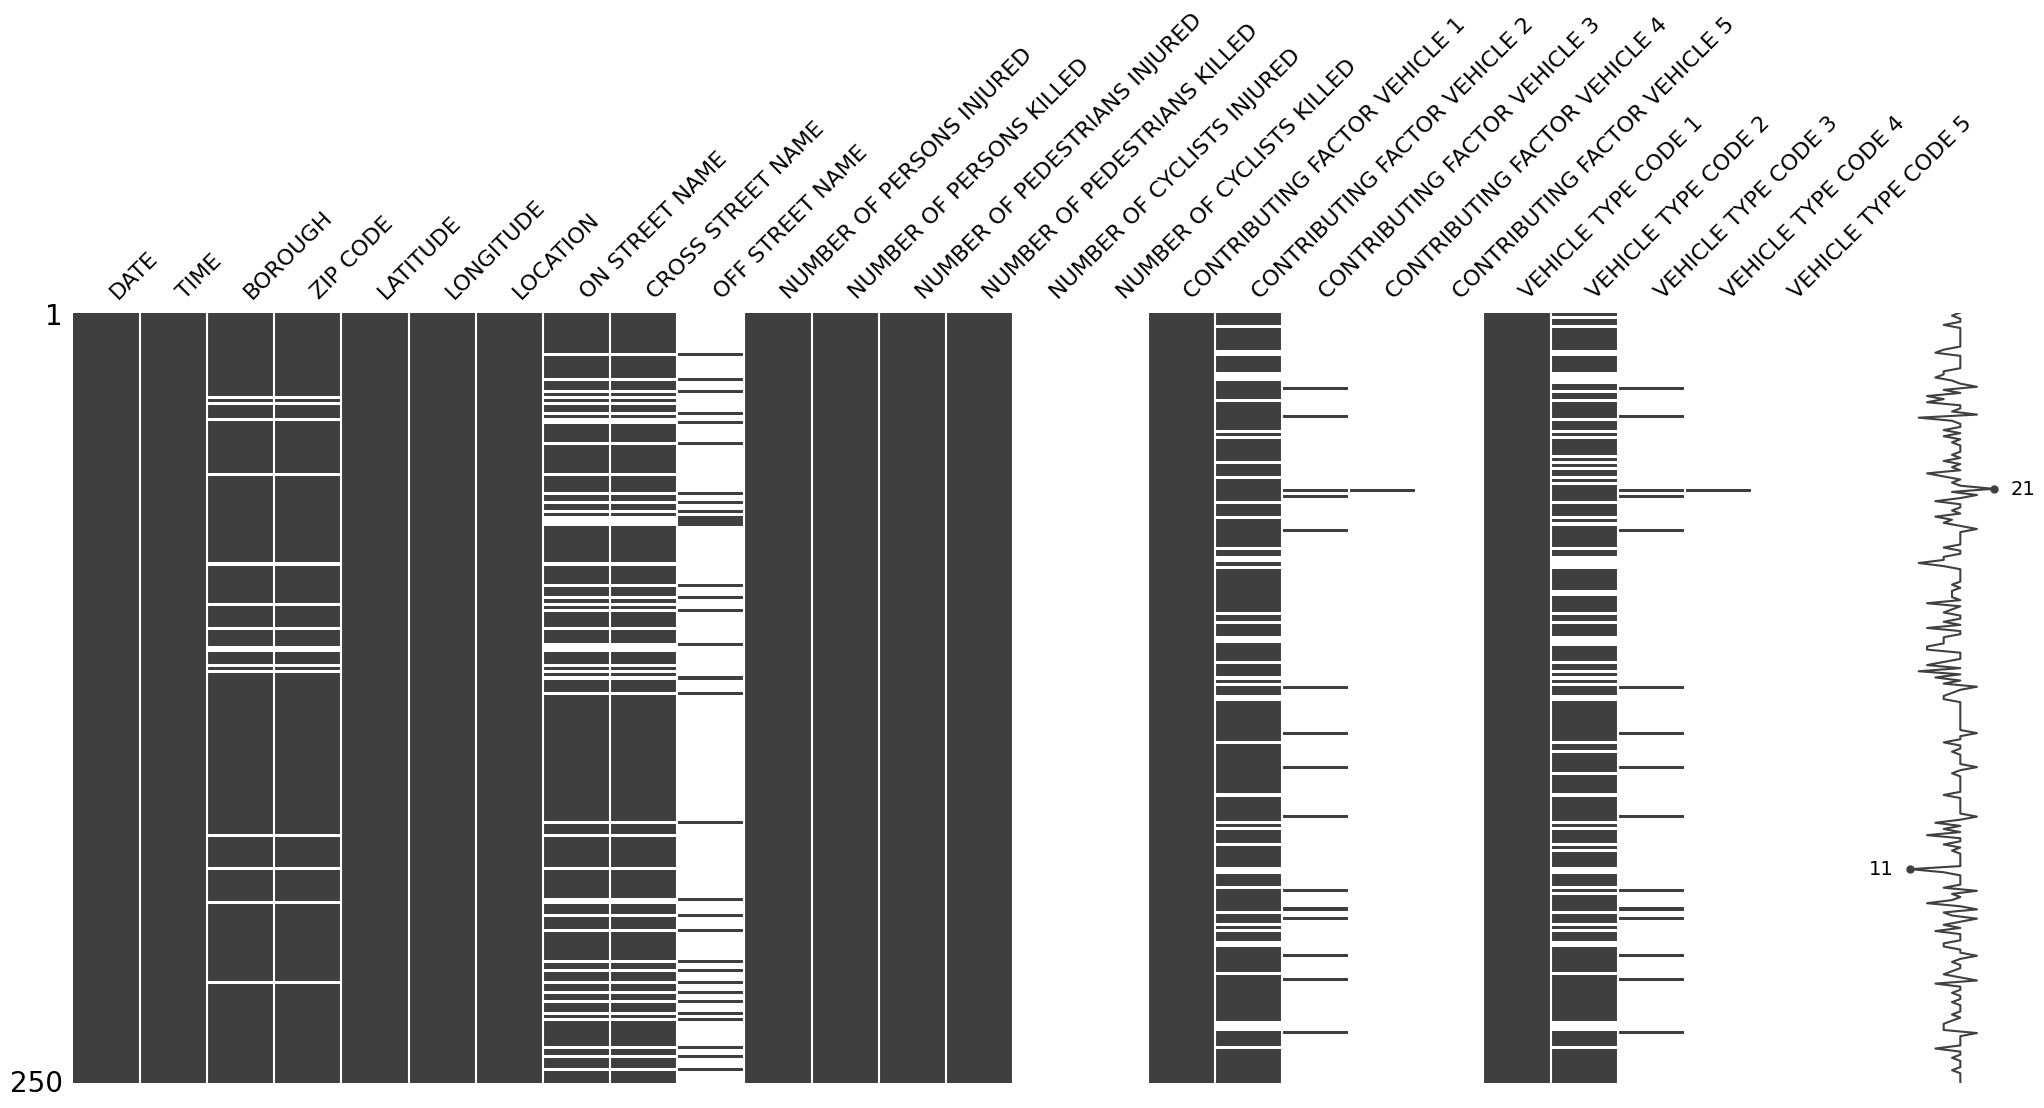

In [6]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
%matplotlib inline
msno.matrix(collisions.sample(250))

## **Imputação de dados ausentes**
## **Nearest Neighbors Imputation**

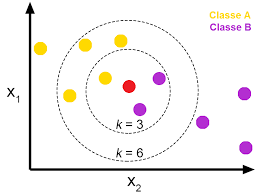

$ d_{AB} = \sqrt{(2 - 2)^2 + (0 - 2)^2} = \sqrt{4}$

$ d_{BC} = \sqrt{(2 - 3)^2 + (2 - 3)^2} = \sqrt{2}$

$ d_{AC} = \sqrt{(2 - 3)^2 + (0 - 3)^2} = \sqrt{10}$

$ d_{xy} = \sqrt{ peso * distância\ quadrada\ das\ coordenadas\ atuais}$

$ peso = \dfrac{Número\ total\ de\ coordenadas}{número\ de\ coordenadas\ presentes} $

Considerando os vetores $ (3, NA, 5) e (1, 0, 0) $

$ \sqrt{\dfrac{3}{2}{(3 - 1)^2 + (5 - 0)^2}} = 6.595453 $

In [12]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.preprocessing import MinMaxScaler

In [9]:
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2, weights='uniform')
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [10]:
aux_dict1 = {"Barbarian":[80, 90, np.nan, 95,65], 
             "Prey":     [60, 65, 56, np.nan,60], 
             "Mandy" :   [np.nan, 57, 80, 78,68],
             "Upgrade" : [78,83,67,np.nan,55]}
  
df_orig_1 = pd.DataFrame(aux_dict1)
df_orig_1

,Barbarian,Prey,Mandy,Upgrade
0,80.0,60.0,NaN,78.0
1,90.0,65.0,57.0,83.0
2,NaN,56.0,80.0,67.0
3,95.0,NaN,78.0,NaN
4,65.0,60.0,68.0,55.0


In [13]:
nan_euclidean_distances(df_orig_1)

array([[ 0.        , 14.14213562, 16.55294536, 30.        , 31.70699187],
       [14.14213562,  0.        , 33.9803865 , 30.52867504, 39.43348831],
       [16.55294536, 33.9803865 ,  0.        ,  4.        , 20.13289183],
       [30.        , 30.52867504,  4.        ,  0.        , 44.72135955],
       [31.70699187, 39.43348831, 20.13289183, 44.72135955,  0.        ]])

In [14]:
N = df_orig_1.shape[0]
N

5

In [15]:
k = np.sqrt(N)/2
k

np.float64(1.118033988749895)

In [16]:
 k = np.sqrt(N)
 k

np.float64(2.23606797749979)

In [17]:
imputer = KNNImputer(n_neighbors = 3)
df_imputation1 = imputer.fit_transform(df_orig_1)
pd.DataFrame(df_imputation1, columns = ["Barbarian","Prey","Mandy","Upgrade"])

,Barbarian,Prey,Mandy,Upgrade
0,80.0,60.000000,71.666667,78.0
1,90.0,65.000000,57.000000,83.0
2,80.0,56.000000,80.000000,67.0
3,95.0,60.333333,78.000000,76.0
4,65.0,60.000000,68.000000,55.0


In [18]:
df_orig_1

,Barbarian,Prey,Mandy,Upgrade
0,80.0,60.0,NaN,78.0
1,90.0,65.0,57.0,83.0
2,NaN,56.0,80.0,67.0
3,95.0,NaN,78.0,NaN
4,65.0,60.0,68.0,55.0


In [19]:
(67+78)/2

72.5

In [20]:
aux_dict2 = {"Barbarian":[80,   90,   50,  np.nan,  50, 60], 
             "Prey":     [90,   85,   56,  65,  50, 60], 
             "Mandy" :   [95,   97,   60,  78,  55, 55],
             "Upgrade" : [85,   93,   47,  55,  45, 40],
             "Premiado": ["Yes","Yes","No","No","No",np.nan  ] }
  
df_orig_2 = pd.DataFrame(aux_dict2)
df_orig_2["Premiado"] = df_orig_2["Premiado"].map({"Yes":1, "No":0})
df_orig_2

,Barbarian,Prey,Mandy,Upgrade,Premiado
0,80.0,90,95,85,1.0
1,90.0,85,97,93,1.0
2,50.0,56,60,47,0.0
3,NaN,65,78,55,0.0
4,50.0,50,55,45,0.0
5,60.0,60,55,40,NaN


In [21]:
scaler = MinMaxScaler()
df_orig_pad_2 = scaler.fit_transform(df_orig_2)
df_orig_pad_2

array([[0.75      , 1.        , 0.95238095, 0.8490566 , 1.        ],
       [1.        , 0.875     , 1.        , 1.        , 1.        ],
       [0.        , 0.15      , 0.11904762, 0.13207547, 0.        ],
       [       nan, 0.375     , 0.54761905, 0.28301887, 0.        ],
       [0.        , 0.        , 0.        , 0.09433962, 0.        ],
       [0.25      , 0.25      , 0.        , 0.        ,        nan]])

In [22]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_imputation2 = imputer.fit_transform(df_orig_pad_2)
df_imputation2

array([[0.75      , 1.        , 0.95238095, 0.8490566 , 1.        ],
       [1.        , 0.875     , 1.        , 1.        , 1.        ],
       [0.        , 0.15      , 0.11904762, 0.13207547, 0.        ],
       [0.        , 0.375     , 0.54761905, 0.28301887, 0.        ],
       [0.        , 0.        , 0.        , 0.09433962, 0.        ],
       [0.25      , 0.25      , 0.        , 0.        , 0.        ]])

In [23]:
df_imputation2 = scaler.inverse_transform(df_imputation2)
df_imputation2 = pd.DataFrame(df_imputation2, columns = ["Barbarian","Prey","Mandy","Upgrade","Premiado"])
df_imputation2

,Barbarian,Prey,Mandy,Upgrade,Premiado
0,80.0,90.0,95.0,85.0,1.0
1,90.0,85.0,97.0,93.0,1.0
2,50.0,56.0,60.0,47.0,0.0
3,50.0,65.0,78.0,55.0,0.0
4,50.0,50.0,55.0,45.0,0.0
5,60.0,60.0,55.0,40.0,0.0


In [24]:
df_orig_2

,Barbarian,Prey,Mandy,Upgrade,Premiado
0,80.0,90,95,85,1.0
1,90.0,85,97,93,1.0
2,50.0,56,60,47,0.0
3,NaN,65,78,55,0.0
4,50.0,50,55,45,0.0
5,60.0,60,55,40,NaN
